In [7]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from ml_tools import *


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random

from xgboost import plot_importance
from xgboost import XGBRegressor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2018

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(3106, 330) 135


/home/erichschulman/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**********************************************************
**************** lasso results ***************************
**********************************************************


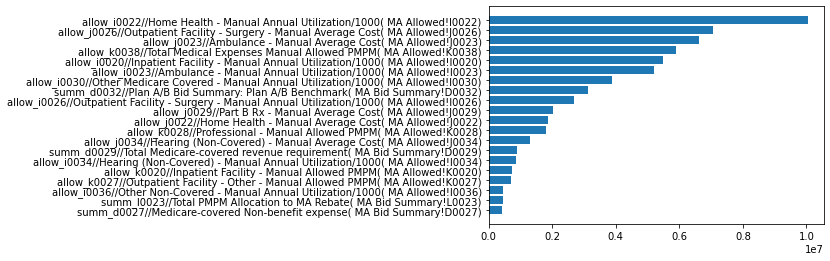

summ_d0027//Medicare-covered Non-benefit expense( MA Bid Summary!D0027)                           4.227970e+05
summ_l0023//Total PMPM Allocation to MA Rebate( MA Bid Summary!L0023)                             4.401382e+05
allow_i0036//Other Non-Covered - Manual Annual Utilization/1000( MA Allowed!I0036)                4.586484e+05
allow_k0027//Outpatient Facility - Other - Manual Allowed PMPM( MA Allowed!K0027)                 6.967086e+05
allow_k0020//Inpatient Facility - Manual Allowed PMPM( MA Allowed!K0020)                          7.459550e+05
allow_i0034//Hearing (Non-Covered) - Manual Annual Utilization/1000( MA Allowed!I0034)            8.474224e+05
summ_d0029//Total Medicare-covered revenue requirement( MA Bid Summary!D0029)                     8.996212e+05
allow_j0034//Hearing (Non-Covered) - Manual Average Cost( MA Allowed!J0034)                       1.315036e+06
allow_k0028//Professional - Manual Allowed PMPM( MA Allowed!K0028)                                1.802007e+06
a

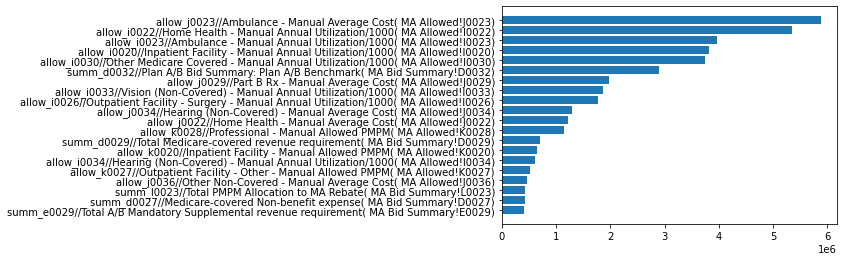

summ_e0029//Total A/B Mandatory Supplemental revenue requirement( MA Bid Summary!E0029)           4.107445e+05
summ_d0027//Medicare-covered Non-benefit expense( MA Bid Summary!D0027)                           4.223645e+05
summ_l0023//Total PMPM Allocation to MA Rebate( MA Bid Summary!L0023)                             4.231065e+05
allow_j0036//Other Non-Covered - Manual Average Cost( MA Allowed!J0036)                           4.634567e+05
allow_k0027//Outpatient Facility - Other - Manual Allowed PMPM( MA Allowed!K0027)                 5.112172e+05
allow_i0034//Hearing (Non-Covered) - Manual Annual Utilization/1000( MA Allowed!I0034)            6.057282e+05
allow_k0020//Inpatient Facility - Manual Allowed PMPM( MA Allowed!K0020)                          6.514561e+05
summ_d0029//Total Medicare-covered revenue requirement( MA Bid Summary!D0029)                     6.966684e+05
allow_k0028//Professional - Manual Allowed PMPM( MA Allowed!K0028)                                1.143451e+06
a

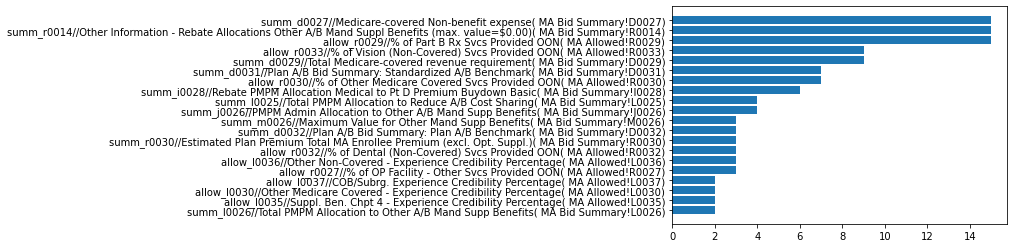

17    summ_d0027//Medicare-covered Non-benefit expen...
30    summ_r0014//Other Information - Rebate Allocat...
10    allow_r0029//% of Part B Rx Svcs Provided OON(...
13    allow_r0033//% of Vision (Non-Covered) Svcs Pr...
18    summ_d0029//Total Medicare-covered revenue req...
19    summ_d0031//Plan A/B Bid Summary: Standardized...
11    allow_r0030//% of Other Medicare Covered Svcs ...
23    summ_i0028//Rebate PMPM Allocation Medical to ...
27    summ_l0025//Total PMPM Allocation to Reduce A/...
25    summ_j0026//PMPM Admin Allocation to Other A/B...
29    summ_m0026//Maximum Value for Other Mand Supp ...
20    summ_d0032//Plan A/B Bid Summary: Plan A/B Ben...
34    summ_r0030//Estimated Plan Premium Total MA En...
12    allow_r0032//% of Dental (Non-Covered) Svcs Pr...
4     allow_l0036//Other Non-Covered - Experience Cr...
8     allow_r0027//% of OP Facility - Other Svcs Pro...
5     allow_l0037//COB/Subrg. Experience Credibility...
2     allow_l0030//Other Medicare Covered - Expe

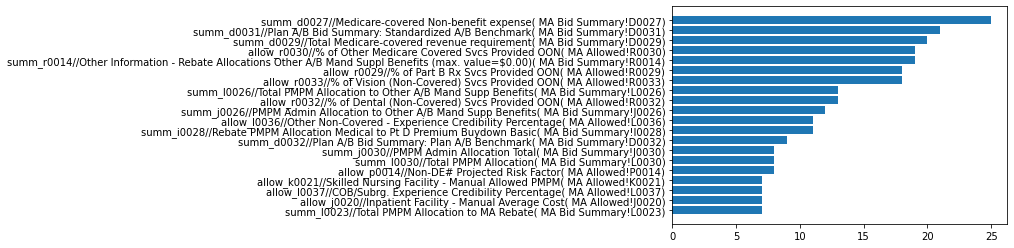

45    summ_d0027//Medicare-covered Non-benefit expen...
47    summ_d0031//Plan A/B Bid Summary: Standardized...
46    summ_d0029//Total Medicare-covered revenue req...
37    allow_r0030//% of Other Medicare Covered Svcs ...
66    summ_r0014//Other Information - Rebate Allocat...
36    allow_r0029//% of Part B Rx Svcs Provided OON(...
40    allow_r0033//% of Vision (Non-Covered) Svcs Pr...
59    summ_l0026//Total PMPM Allocation to Other A/B...
39    allow_r0032//% of Dental (Non-Covered) Svcs Pr...
55    summ_j0026//PMPM Admin Allocation to Other A/B...
22    allow_l0036//Other Non-Covered - Experience Cr...
52    summ_i0028//Rebate PMPM Allocation Medical to ...
48    summ_d0032//Plan A/B Bid Summary: Plan A/B Ben...
56    summ_j0030//PMPM Admin Allocation Total( MA Bi...
62    summ_l0030//Total PMPM Allocation( MA Bid Summ...
25    allow_p0014//Non-DE# Projected Risk Factor( MA...
10    allow_k0021//Skilled Nursing Facility - Manual...
23    allow_l0037//COB/Subrg. Experience Credibi

In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from ml_tools import *


data_year = 2018
num_trials = 5
df = read_bid_data(data_year)
y,X = clean_bid_data(df)
training_test = train_test_pfold(X,y, num_trials = 5)

print('**********************************************************')
print('**************** lasso results ***************************')
print('**********************************************************')

# Vary alpha values
a = [250,500]

for i in a: 
    run_lasso(i,training_test)

print('**********************************************************')
print('**************** tree results ****************************')
print('**********************************************************')

params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

# 2012

(3503, 330) 137
**********************************************************
**************** lasso results ***************************
**********************************************************


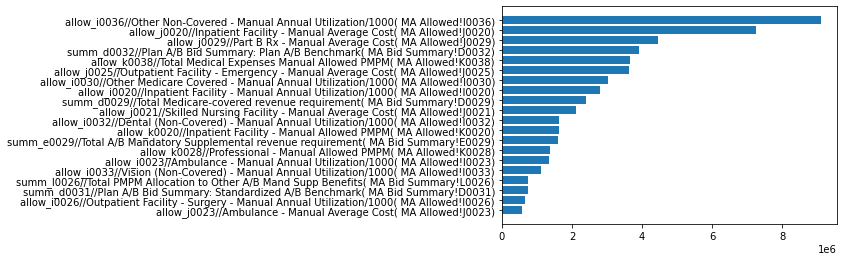

allow_j0023//Ambulance - Manual Average Cost( MA Allowed!J0023)                                   5.753022e+05
allow_i0026//Outpatient Facility - Surgery - Manual Annual Utilization/1000( MA Allowed!I0026)    6.632578e+05
summ_d0031//Plan A/B Bid Summary: Standardized A/B Benchmark( MA Bid Summary!D0031)               7.431739e+05
summ_l0026//Total PMPM Allocation to Other A/B Mand Supp Benefits( MA Bid Summary!L0026)          7.559266e+05
allow_i0033//Vision (Non-Covered) - Manual Annual Utilization/1000( MA Allowed!I0033)             1.117583e+06
allow_i0023//Ambulance - Manual Annual Utilization/1000( MA Allowed!I0023)                        1.346479e+06
allow_k0028//Professional - Manual Allowed PMPM( MA Allowed!K0028)                                1.362693e+06
summ_e0029//Total A/B Mandatory Supplemental revenue requirement( MA Bid Summary!E0029)           1.591646e+06
allow_k0020//Inpatient Facility - Manual Allowed PMPM( MA Allowed!K0020)                          1.617900e+06
a

In [ ]:
data_year = 2012
num_trials = 5
df = read_bid_data(data_year)
y,X = clean_bid_data(df)
training_test = train_test_pfold(X,y, num_trials = 5)

print('**********************************************************')
print('**************** lasso results ***************************')
print('**********************************************************')

# Vary alpha values
a = [250,500]

for i in a: 
    run_lasso(i,training_test)

print('**********************************************************')
print('**************** tree results ****************************')
print('**********************************************************')

params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)